In [1]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')

In [3]:
df.head().style.background_gradient(cmap="PuBu")

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,nan,Yes,42.390000,No,Yes,Cable,16.000000,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.600000,593.300000,0.000000,0,381.510000,974.810000,Stayed,nan,nan
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,nan,Yes,10.690000,Yes,Yes,Cable,10.000000,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.000000,542.400000,38.330000,10,96.210000,610.280000,Stayed,nan,nan
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.650000,No,Yes,Fiber Optic,30.000000,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.900000,280.850000,0.000000,0,134.600000,415.450000,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.820000,No,Yes,Fiber Optic,4.000000,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.000000,1237.850000,0.000000,0,361.660000,1599.510000,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,nan,Yes,7.380000,No,Yes,Fiber Optic,11.000000,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900000,267.400000,0.000000,0,22.140000,289.540000,Churned,Dissatisfaction,Network reliability


In [4]:
from colorama import Fore, Style

print(Fore.CYAN + "df shape: "+ Style.RESET_ALL)
print(f"{df.shape}\n")

print(Fore.GREEN + "df info: "+ Style.RESET_ALL)
print(f"{df.shape}\n")

print(Fore.YELLOW + "df isnull sum: " + Style.RESET_ALL)
print(f"{df.isnull().mean()}\n")

print(Fore.MAGENTA + "df describe: "+ Style.RESET_ALL)
print(f"{df.describe()}\n")

df shape: 
(7043, 38)

df info: 
(7043, 38)

df isnull sum: 
Customer ID                          0.000000
Gender                               0.000000
Age                                  0.000000
Married                              0.000000
Number of Dependents                 0.000000
City                                 0.000000
Zip Code                             0.000000
Latitude                             0.000000
Longitude                            0.000000
Number of Referrals                  0.000000
Tenure in Months                     0.000000
Offer                                0.550476
Phone Service                        0.000000
Avg Monthly Long Distance Charges    0.096834
Multiple Lines                       0.096834
Internet Service                     0.000000
Internet Type                        0.216669
Avg Monthly GB Download              0.216669
Online Security                      0.216669
Online Backup                        0.216669
Device Protection P

In [5]:
# define the numerical and categorical columns
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object","bool"]).columns

print(f" We have features: {len(numerical_cols)} numerical features {numerical_cols}")
print("-"*150)
print(f" We have features: {len(categorical_cols)} categorical features {categorical_cols}")

 We have features: 15 numerical features Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
 We have features: 23 categorical features Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', '

In [6]:
#df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

df.columns = (
    df.columns
    .str.replace('_', '', regex=False)   # saare underscores hatao
    .str.lower()
)

In [7]:
df.columns


Index(['customer id', 'gender', 'age', 'married', 'number of dependents',
       'city', 'zip code', 'latitude', 'longitude', 'number of referrals',
       'tenure in months', 'offer', 'phone service',
       'avg monthly long distance charges', 'multiple lines',
       'internet service', 'internet type', 'avg monthly gb download',
       'online security', 'online backup', 'device protection plan',
       'premium tech support', 'streaming tv', 'streaming movies',
       'streaming music', 'unlimited data', 'contract', 'paperless billing',
       'payment method', 'monthly charge', 'total charges', 'total refunds',
       'total extra data charges', 'total long distance charges',
       'total revenue', 'customer status', 'churn category', 'churn reason'],
      dtype='object')

In [8]:
df.columns.tolist()


['customer id',
 'gender',
 'age',
 'married',
 'number of dependents',
 'city',
 'zip code',
 'latitude',
 'longitude',
 'number of referrals',
 'tenure in months',
 'offer',
 'phone service',
 'avg monthly long distance charges',
 'multiple lines',
 'internet service',
 'internet type',
 'avg monthly gb download',
 'online security',
 'online backup',
 'device protection plan',
 'premium tech support',
 'streaming tv',
 'streaming movies',
 'streaming music',
 'unlimited data',
 'contract',
 'paperless billing',
 'payment method',
 'monthly charge',
 'total charges',
 'total refunds',
 'total extra data charges',
 'total long distance charges',
 'total revenue',
 'customer status',
 'churn category',
 'churn reason']

In [10]:
df.drop(
    columns=['customer id', 'zip code', 'latitude', 'longitude'],
    inplace=True
)

In [15]:
dfc = df.loc[df['customer status'] != 'Joined']


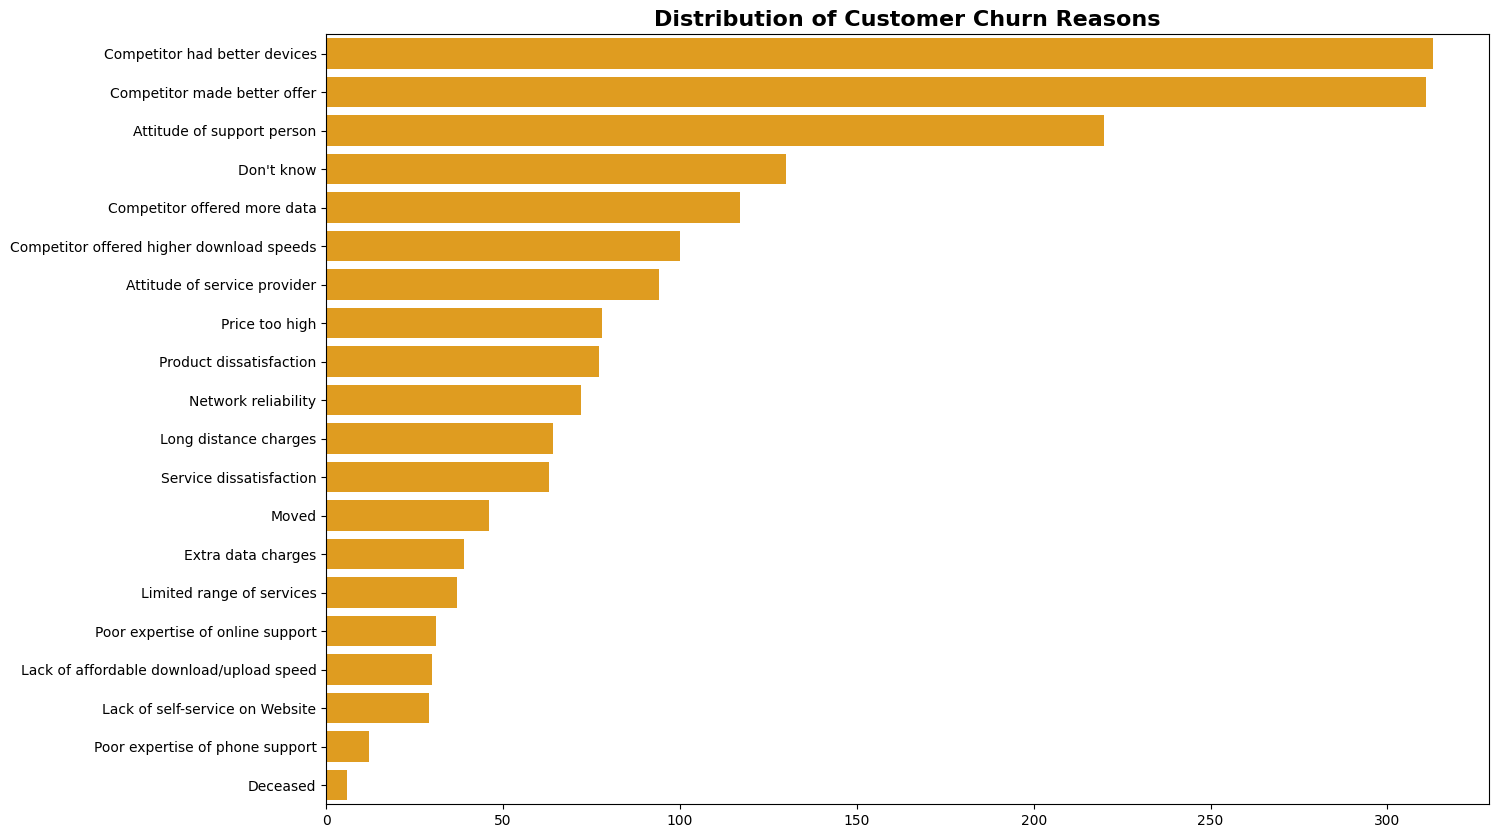

In [17]:
# ✅ Set the figure size for the chart
fig = plt.figure(figsize=(15, 10))

#  Create a horizontal count plot showing the frequency of each churn reason
# 'order' ensures bars are sorted by their count (most common at the top)
# 'color' sets a consistent aesthetic color for all bars
ax = sns.countplot(
    data=dfc,
    y='churn reason',
    order=dfc['churn reason'].value_counts().index,
    color="orange"
)

# Remove x and y axis labels for a cleaner look
ax.set(xlabel=None, ylabel=None)

#  Add a descriptive title to the chart
plt.title('Distribution of Customer Churn Reasons', fontsize=16, fontweight='bold')

plt.show()

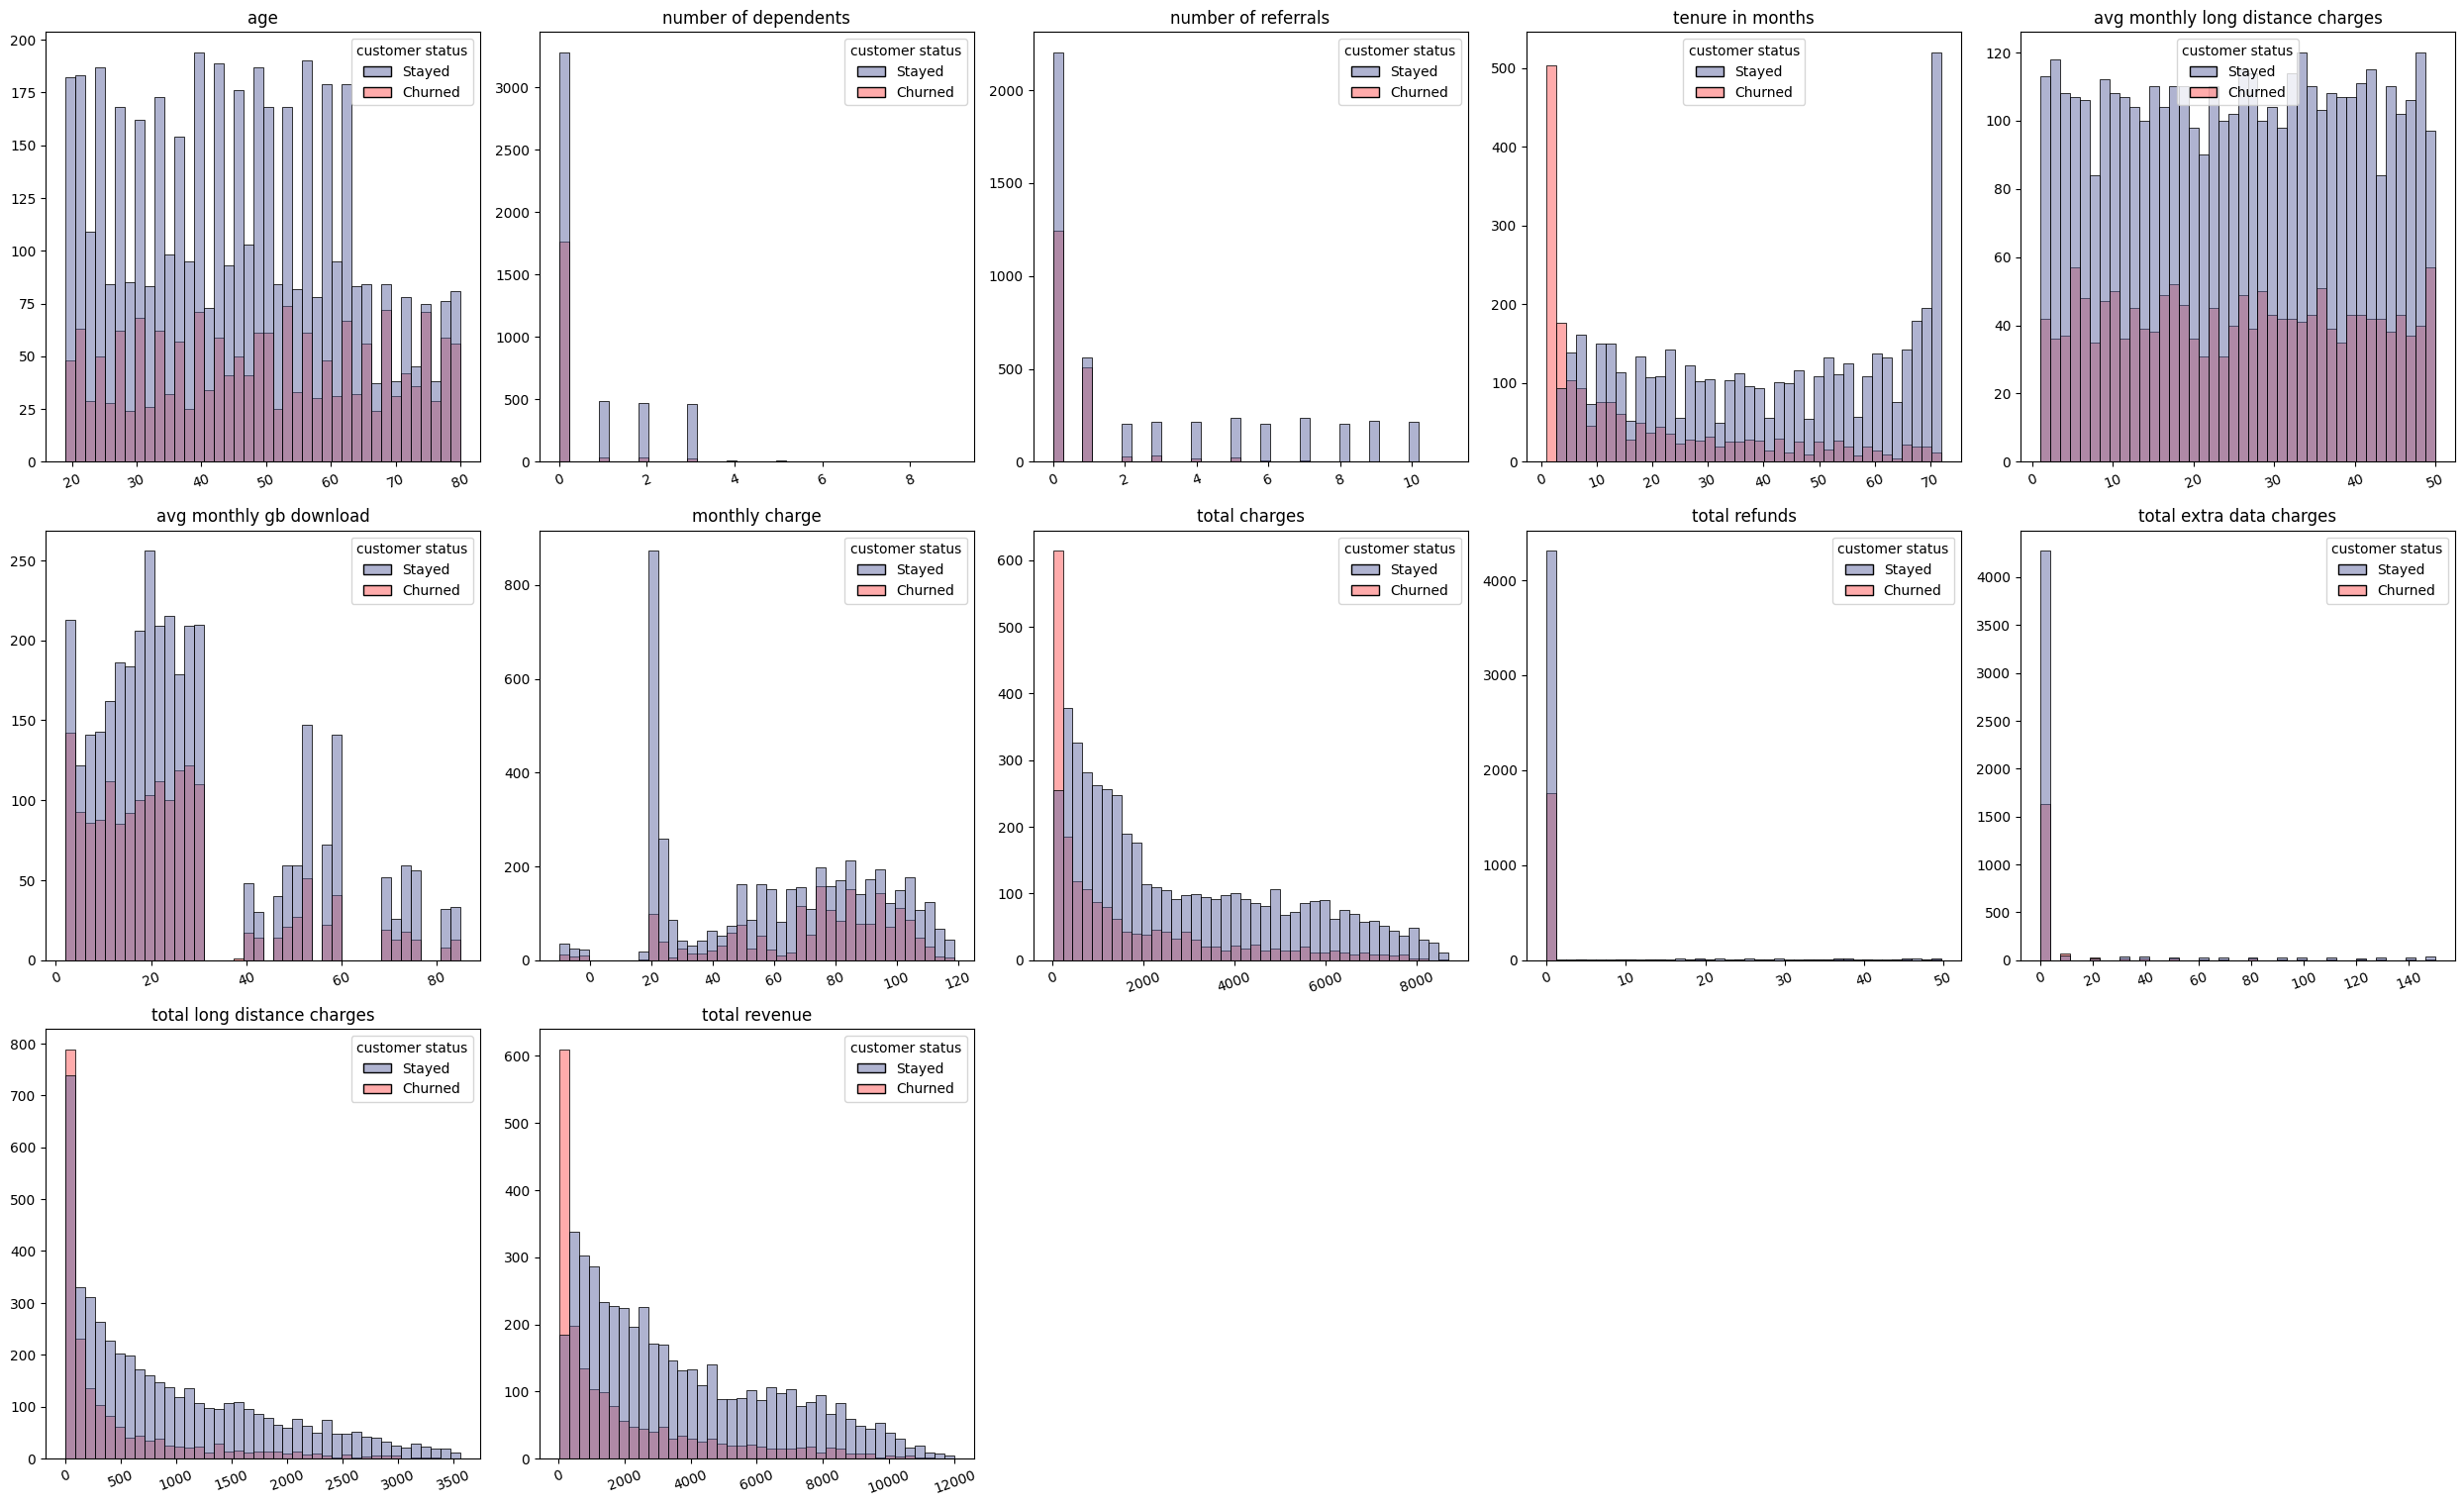

In [18]:
# EDA..
num = [cname for cname in dfc.columns if dfc[cname].dtype in ['int64', 'float64']]

dfc_num = dfc[num]

fig = plt.figure(figsize=(25, 25))

i = 1  # Counter for subplot indexing

# Loop through each numerical column to create a histogram
for n in dfc_num.columns:
    plt.subplot(5, 5, i)  # Create a 5x5 grid of subplots (adjust as needed)

    ax = sns.histplot(
        x=dfc[n],
        hue=dfc['customer status'],
        palette=["#6069A3", '#FF5959'],
        bins=40
    )
    
    # Remove axis labels to keep plots clean
    ax.set(xlabel=None, ylabel=None)
    
    # ✅ Add column name as the title for each subplot
    plt.title(str(n), loc='center')
    
    # ✅ Rotate x-axis labels slightly for readability
    plt.xticks(rotation=20, fontsize=10)
    
    i += 1  # Move to next subplot

plt.tight_layout()
plt.show()

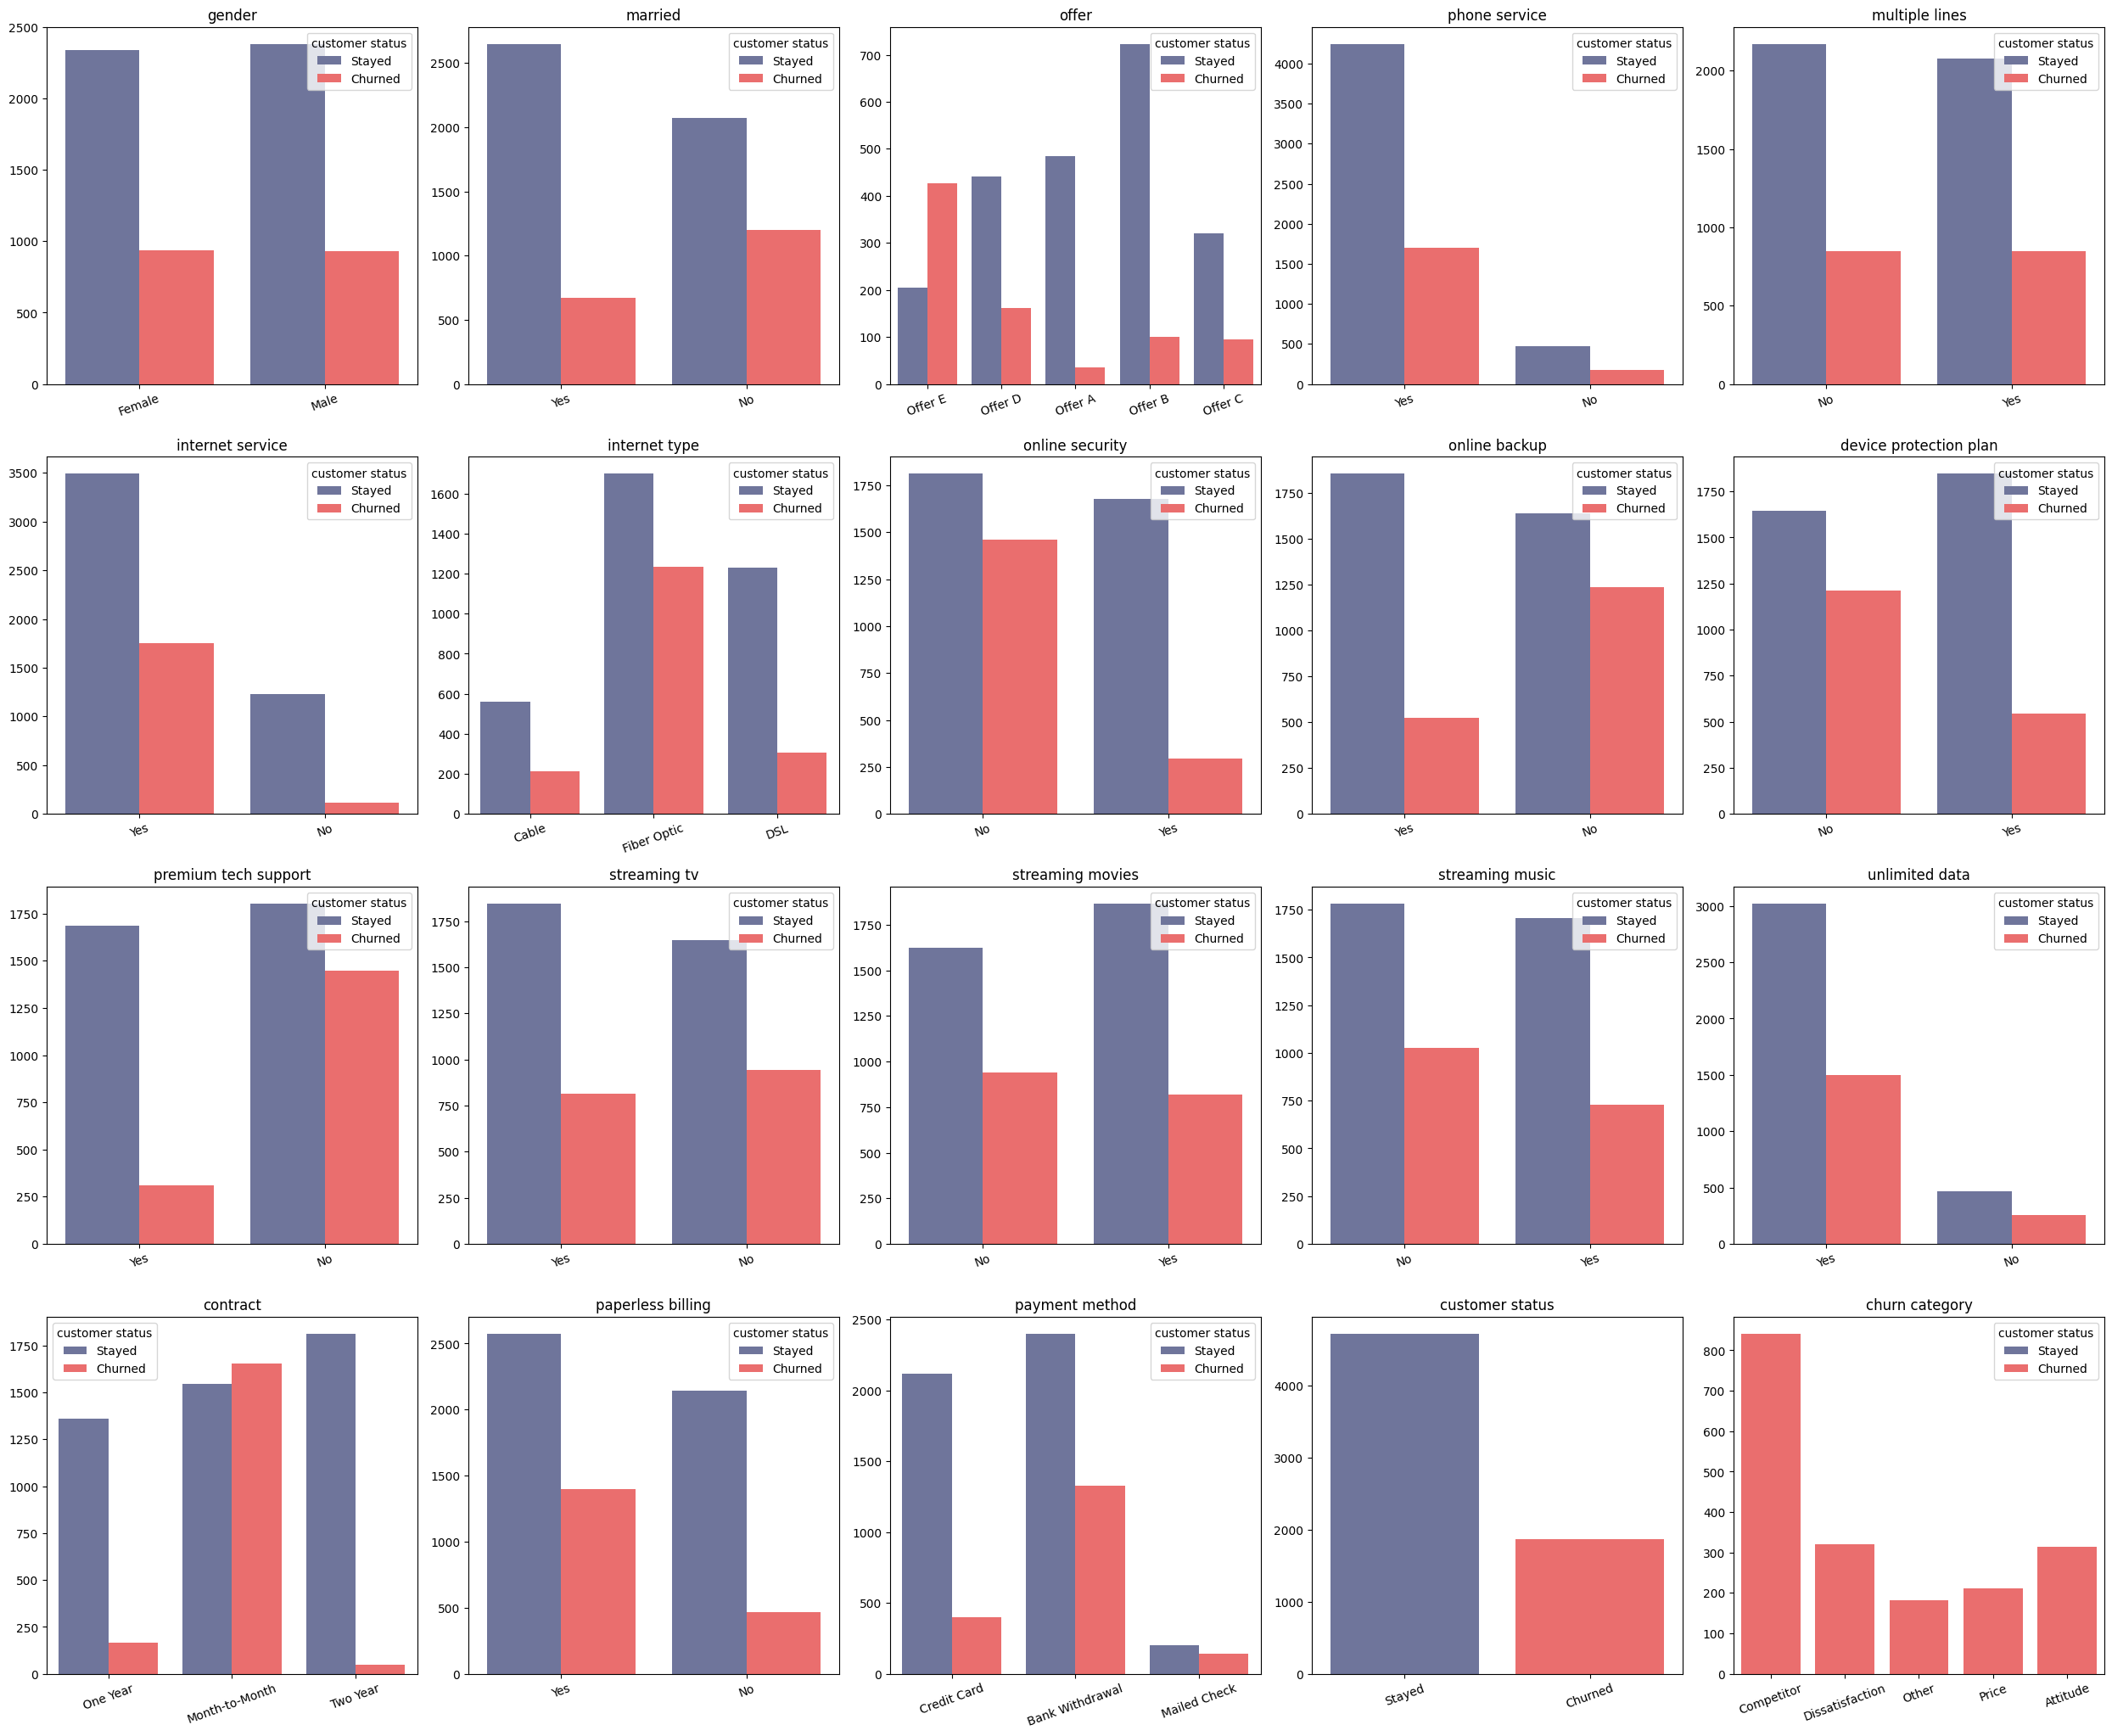

In [19]:
#.nsights..


#  Select all categorical columns with fewer than 10 unique values
# This filters out high-cardinality columns that are hard to visualize
cat = [cname for cname in dfc.columns if dfc[cname].nunique() < 10 and dfc[cname].dtype == "object"]

dfc_cat = dfc[cat]
fig = plt.figure(figsize=(25, 25))

i = 1
#  Loop through each categorical column and plot its distribution
for c in dfc_cat.columns:
    plt.subplot(5, 5, i)  # Create a grid of subplots (5x5 layout)
    ax = sns.countplot(
        data=dfc_cat,
        x=c,
        hue='customer status',
        palette=['#676FA3', '#FF5959']
    )
    
    #Remove axis labels for cleaner visuals
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation=20, fontsize=10)
    
    i += 1  # Move to next subplot
plt.tight_layout()
plt.show()

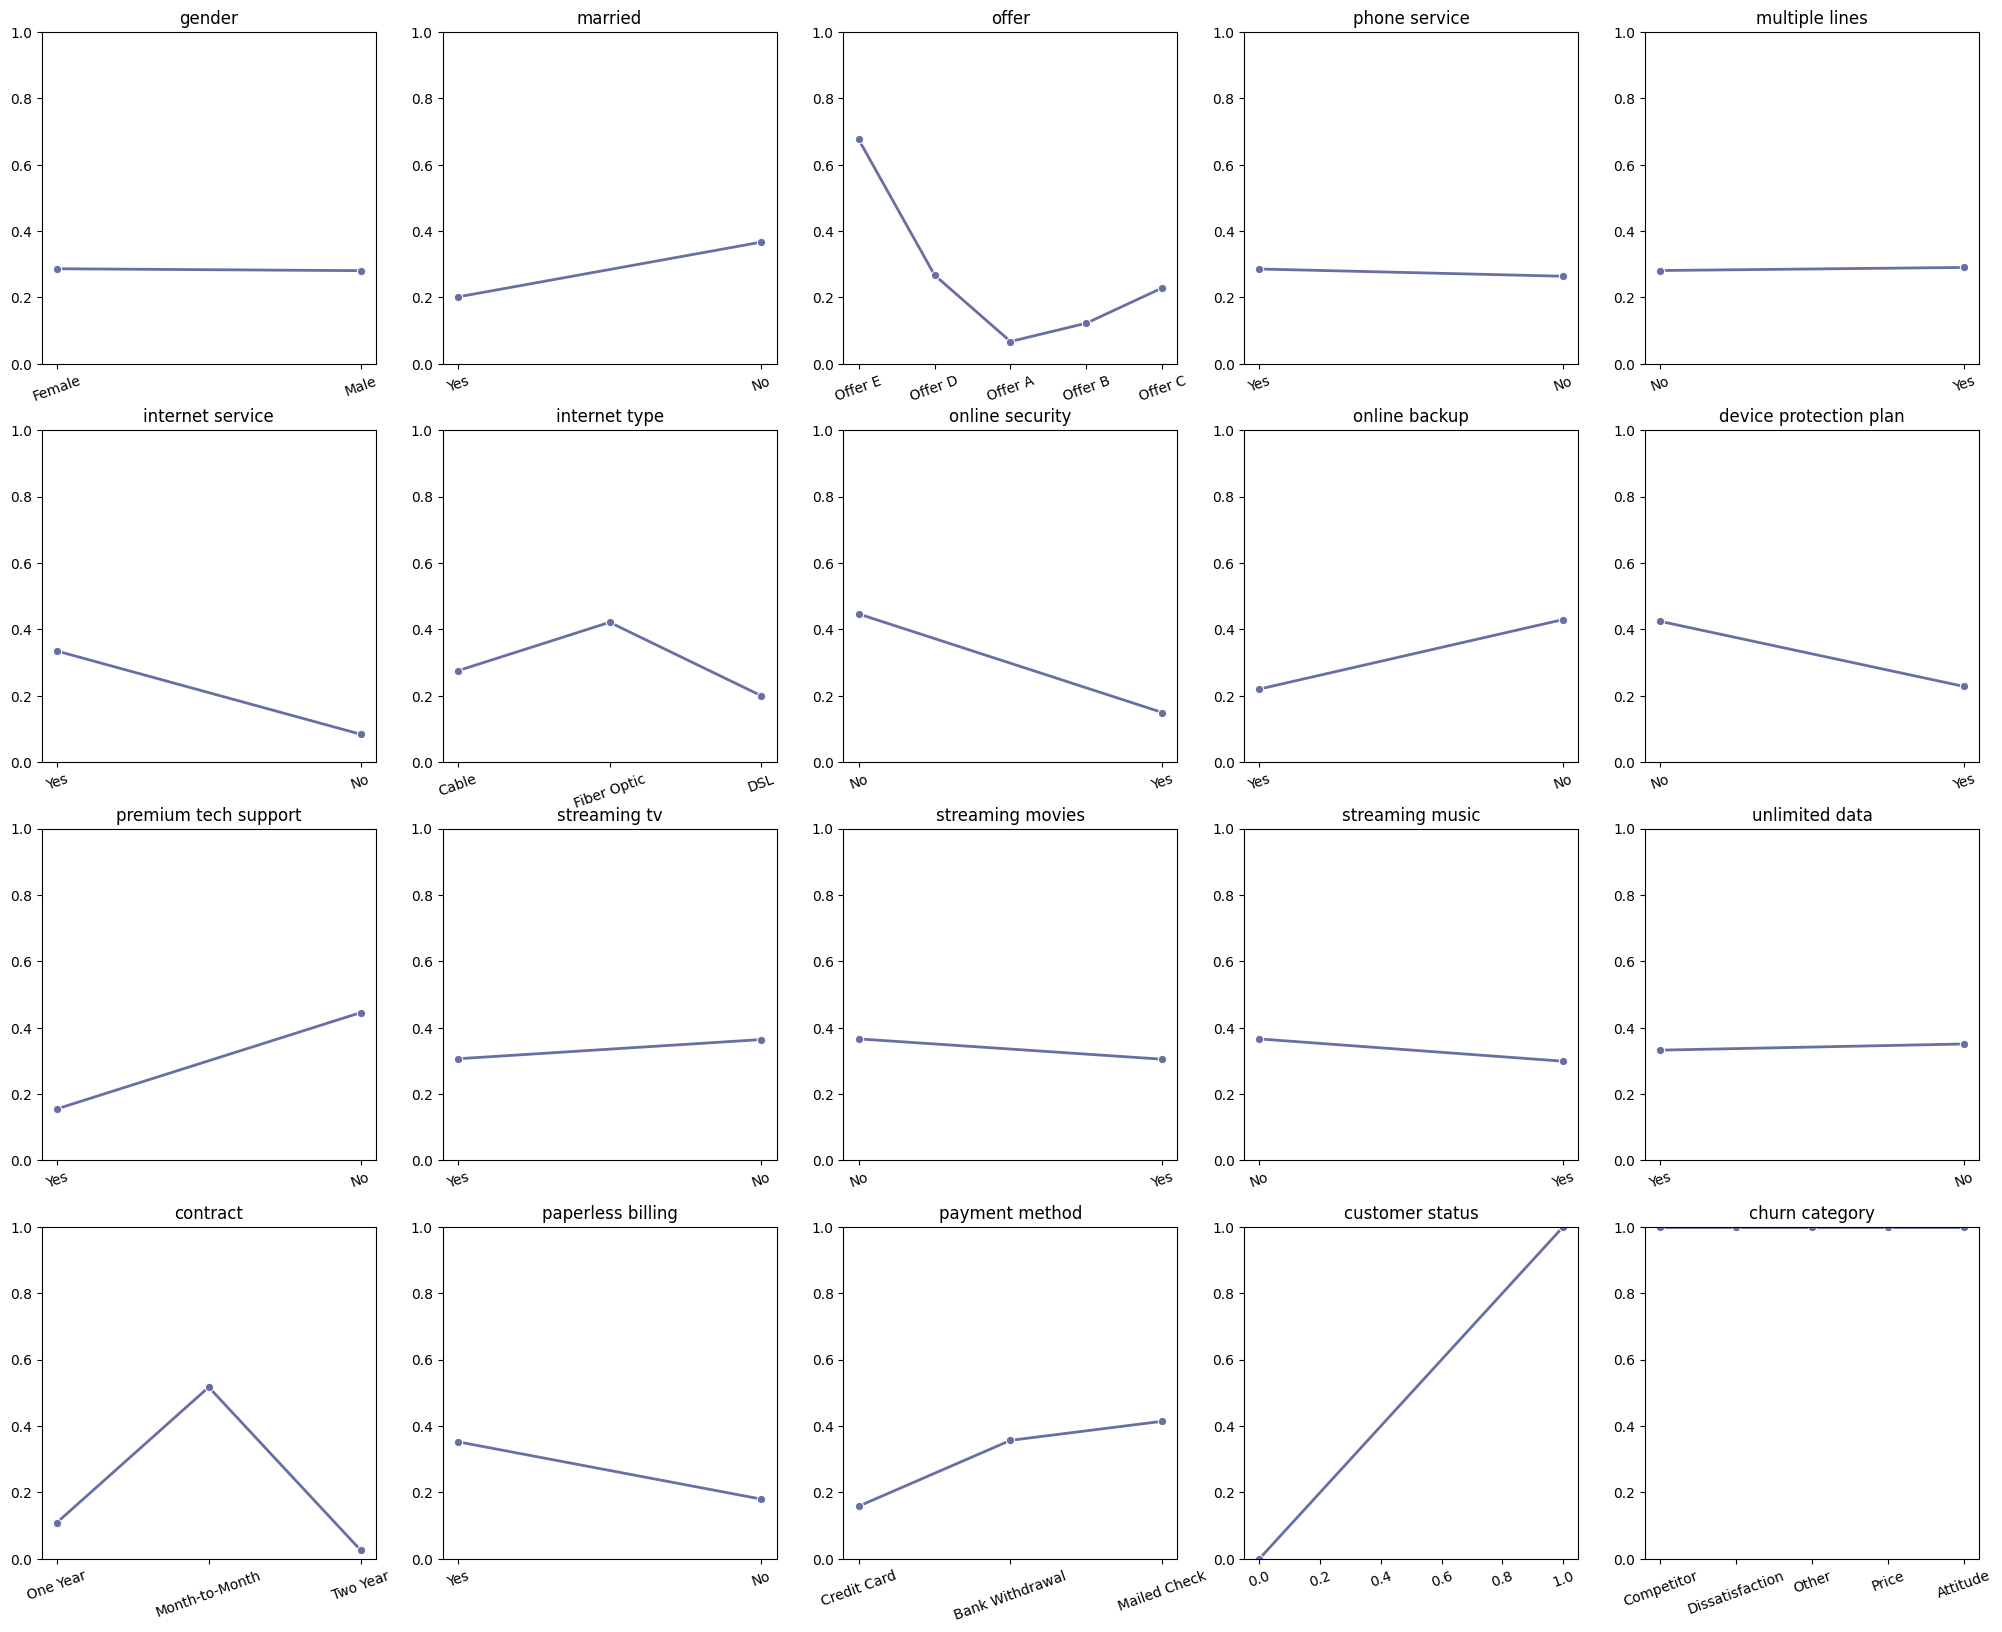

In [26]:
# Convert 'customer_status' from text labels to binary (0 = Stayed, 1 = Churned)
dfc.loc[dfc['customer status'] == 'Stayed', 'customer status'] = 0
dfc.loc[dfc['customer status'] == 'Churned', 'customer status'] = 1


# Split categorical and numerical features for separate analysis
dfc_cat = dfc[cat]
dfc_num = dfc[num]

fig = plt.figure(figsize=(25, 25))  # Set overall figure size

i = 1
for c in dfc_cat.columns:
    plt.subplot(5, 5, i)  # Create subplot grid
    
    # Plot line showing relationship between each categorical feature and churn status
    ax = sns.lineplot(
        data=dfc_cat,
        x=dfc_cat[c],
        y=dfc_cat['customer status'],
        linewidth=2,
        marker='o',
        ci=None,
        color='#676FA3'
    )
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.ylim(0, 1)
    plt.xticks(rotation=20, fontsize=10)
    i += 1

In [28]:
dfc['total revenue'].mean()


np.float64(3235.2180816512373)

In [29]:
dfc['high value'] = 0
dfc.loc[(dfc['total revenue'] > 3235.2180816512373) & (dfc['customer status'] == 0), 'high value'] = 'High Value'

In [33]:
dfc['high value'].value_counts()


high value
0             4392
High Value    2197
Name: count, dtype: int64

In [35]:
df_highvalue = dfc[dfc['high value'] == 'High Value']


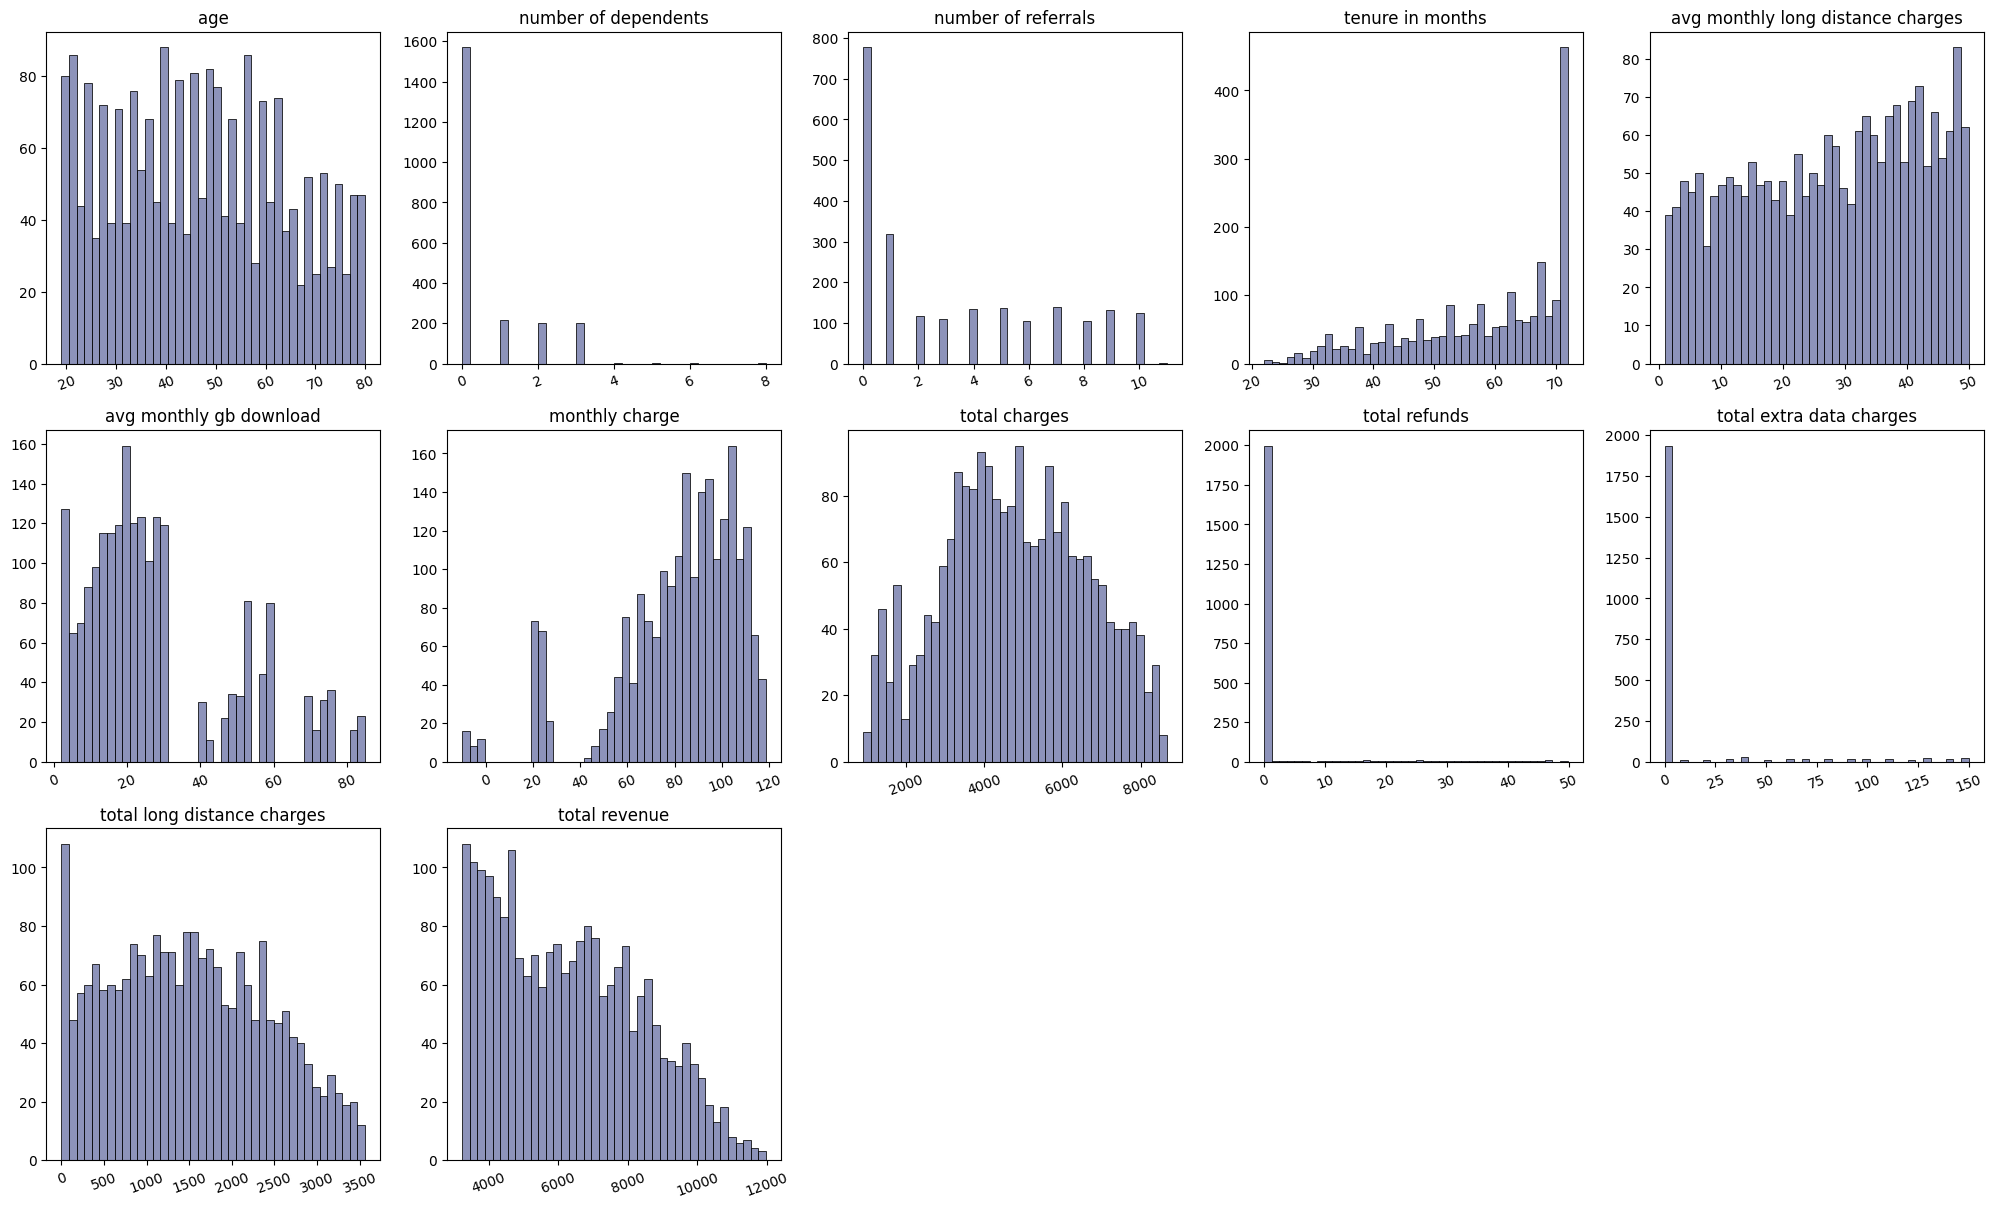

In [37]:
# Select all numerical columns (int or float types)
num = [cname for cname in df_highvalue.columns if df_highvalue[cname].dtype in ['int64', 'float64']]

# Subset the dataframe with only numerical features
_ = df_highvalue[num]

fig = plt.figure(figsize=(25, 25))  # Set figure size for better visibility

i = 1
for n in _.columns:
    plt.subplot(5, 5, i)  # Create a 5x5 grid of subplots
    
    # Plot histogram for each numerical column
    ax = sns.histplot(x=df_highvalue[n], color='#676FA3', bins=40)
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(n), loc='center')
    plt.xticks(rotation=20, fontsize=10)
    i += 1

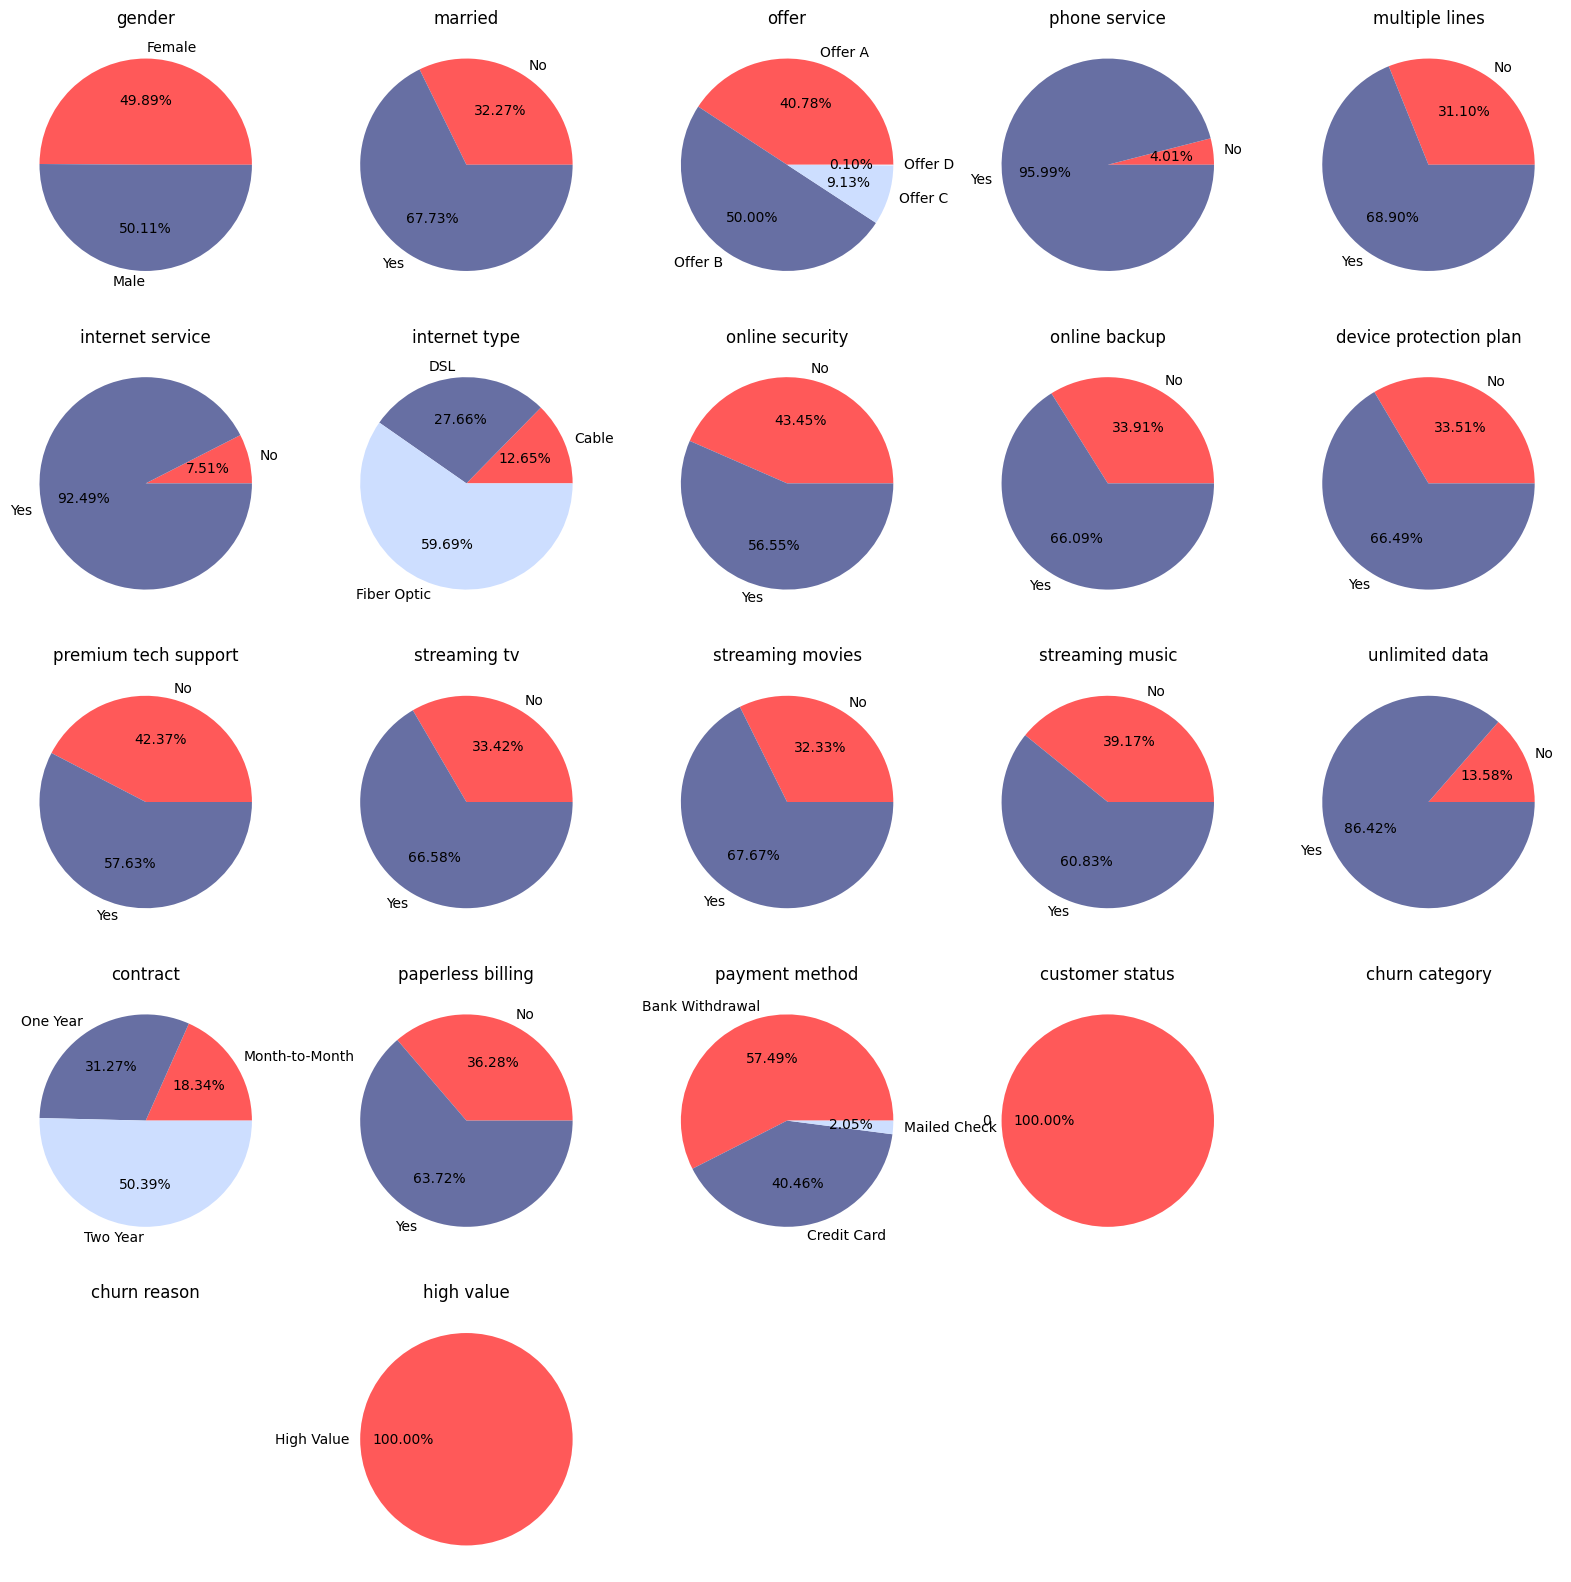

In [38]:
# Select categorical columns with fewer than 10 unique values
cat = [cname for cname in df_highvalue.columns if df_highvalue[cname].nunique() < 10 and df_highvalue [cname].dtype == "object"]

# Create a subset containing only those categorical columns
_ = df_highvalue[cat]

fig = plt.figure(figsize=(20, 20))  # Set figure size for clear visualization

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)  # Arrange subplots in a 5x5 grid

    # Plot a pie chart for each categorical column
    ax = df_highvalue.groupby([c]).size().plot(
        kind='pie',
        autopct='%.2f%%',
        colors=['#FF5959', '#676FA3', '#CDDEFF', '#EEF2FF']
    )
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')  # Add column name as the title
    i += 1

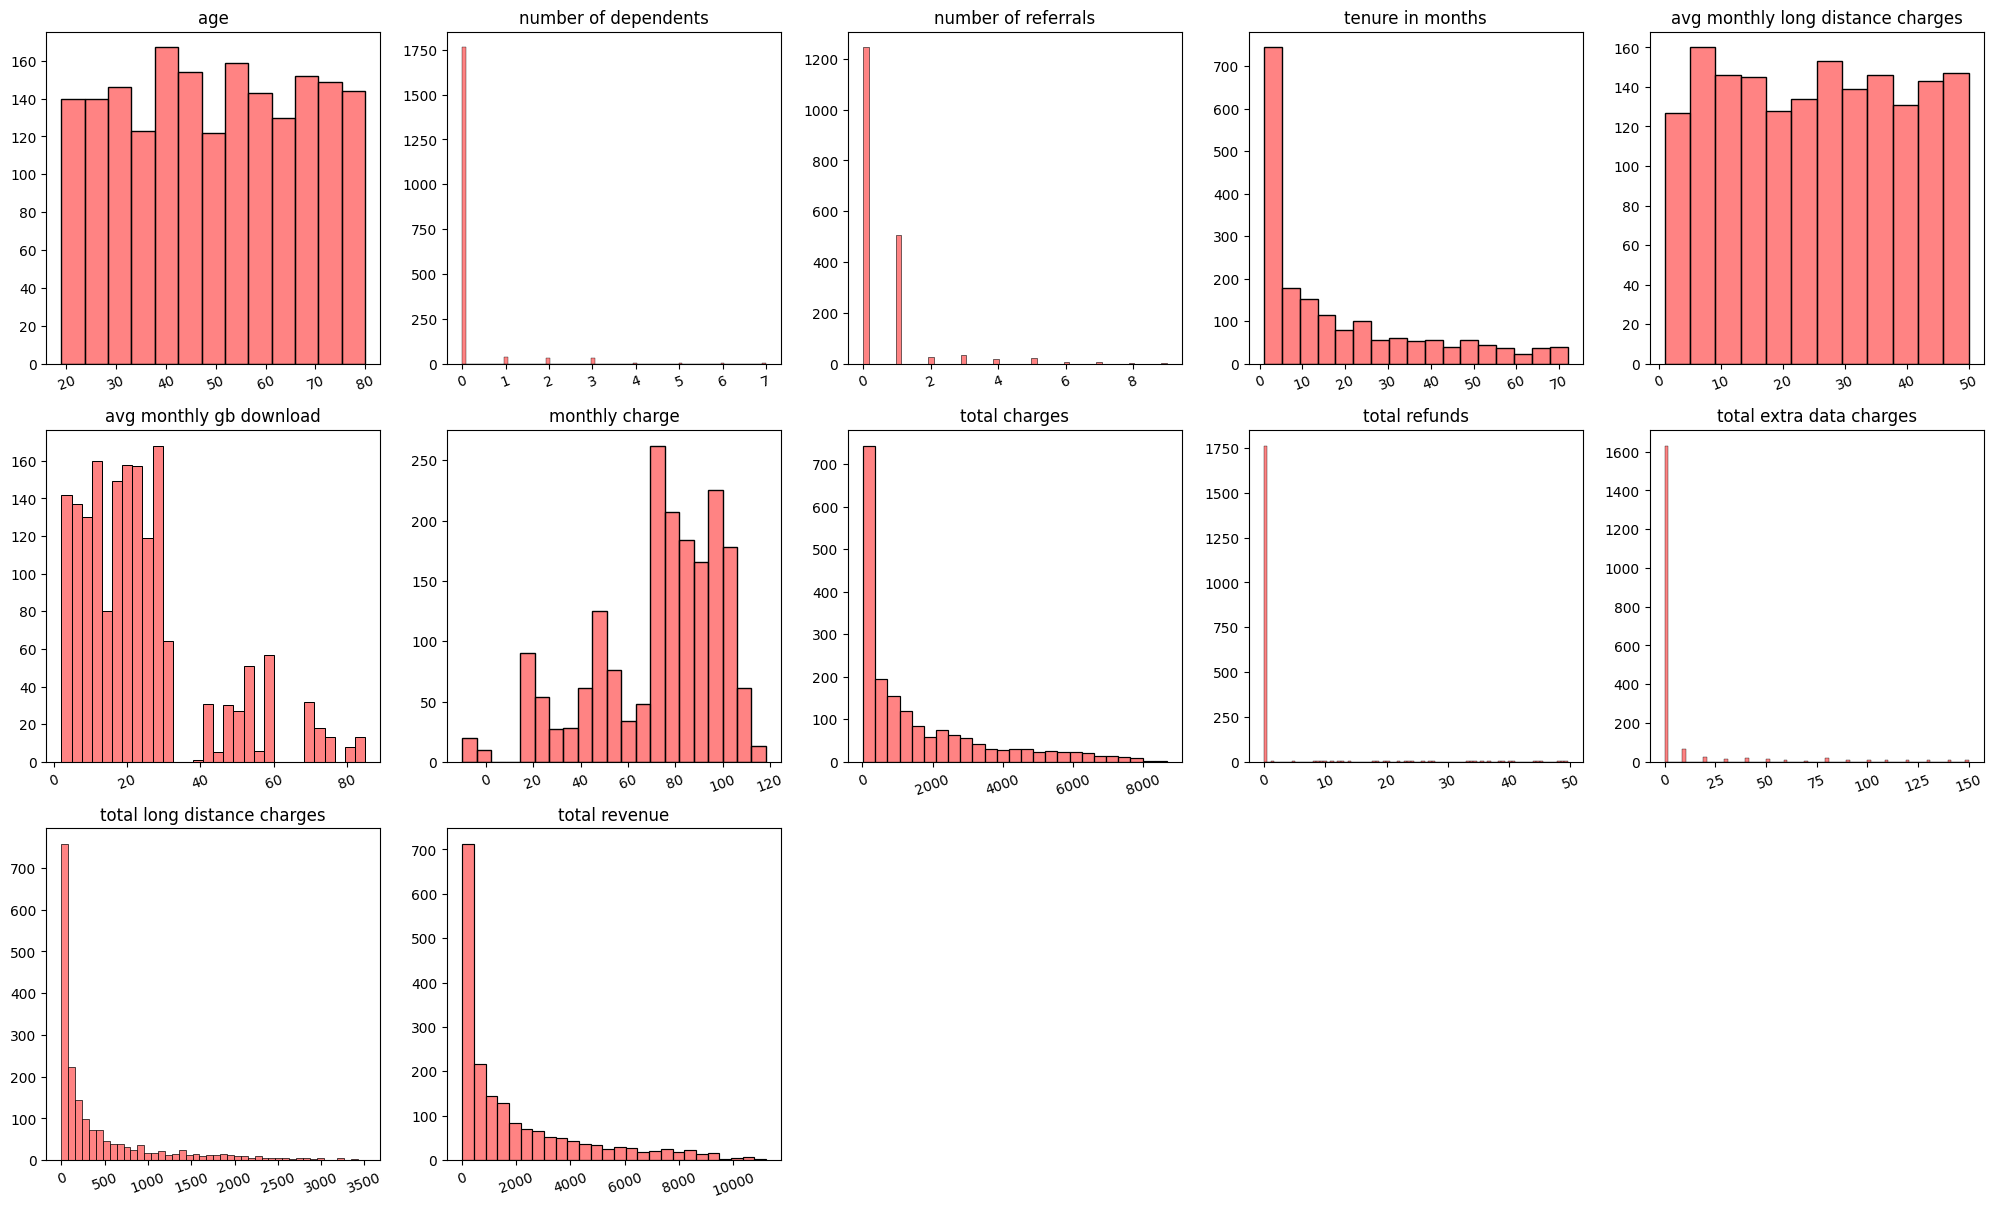

In [39]:
df_churned = dfc.loc[dfc['customer status'] == 1]

# Select all numeric columns (int or float) from churned customers
num = [cname for cname in df_churned.columns if df_churned[cname].dtype in ['int64', 'float64']]

# Create a subset of only numerical columns
_ = df_churned[num]

fig = plt.figure(figsize=(25, 25))  # Set figure size for multiple histograms

i = 1
for n in _.columns:
    plt.subplot(5, 5, i)  # Create subplot grid
    ax = sns.histplot(x=df_churned[n], color='#FF5959')  # Plot histogram in red tone
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(n), loc='center')  # Show column name as title
    plt.xticks(rotation=20, fontsize=10)
    i += 1

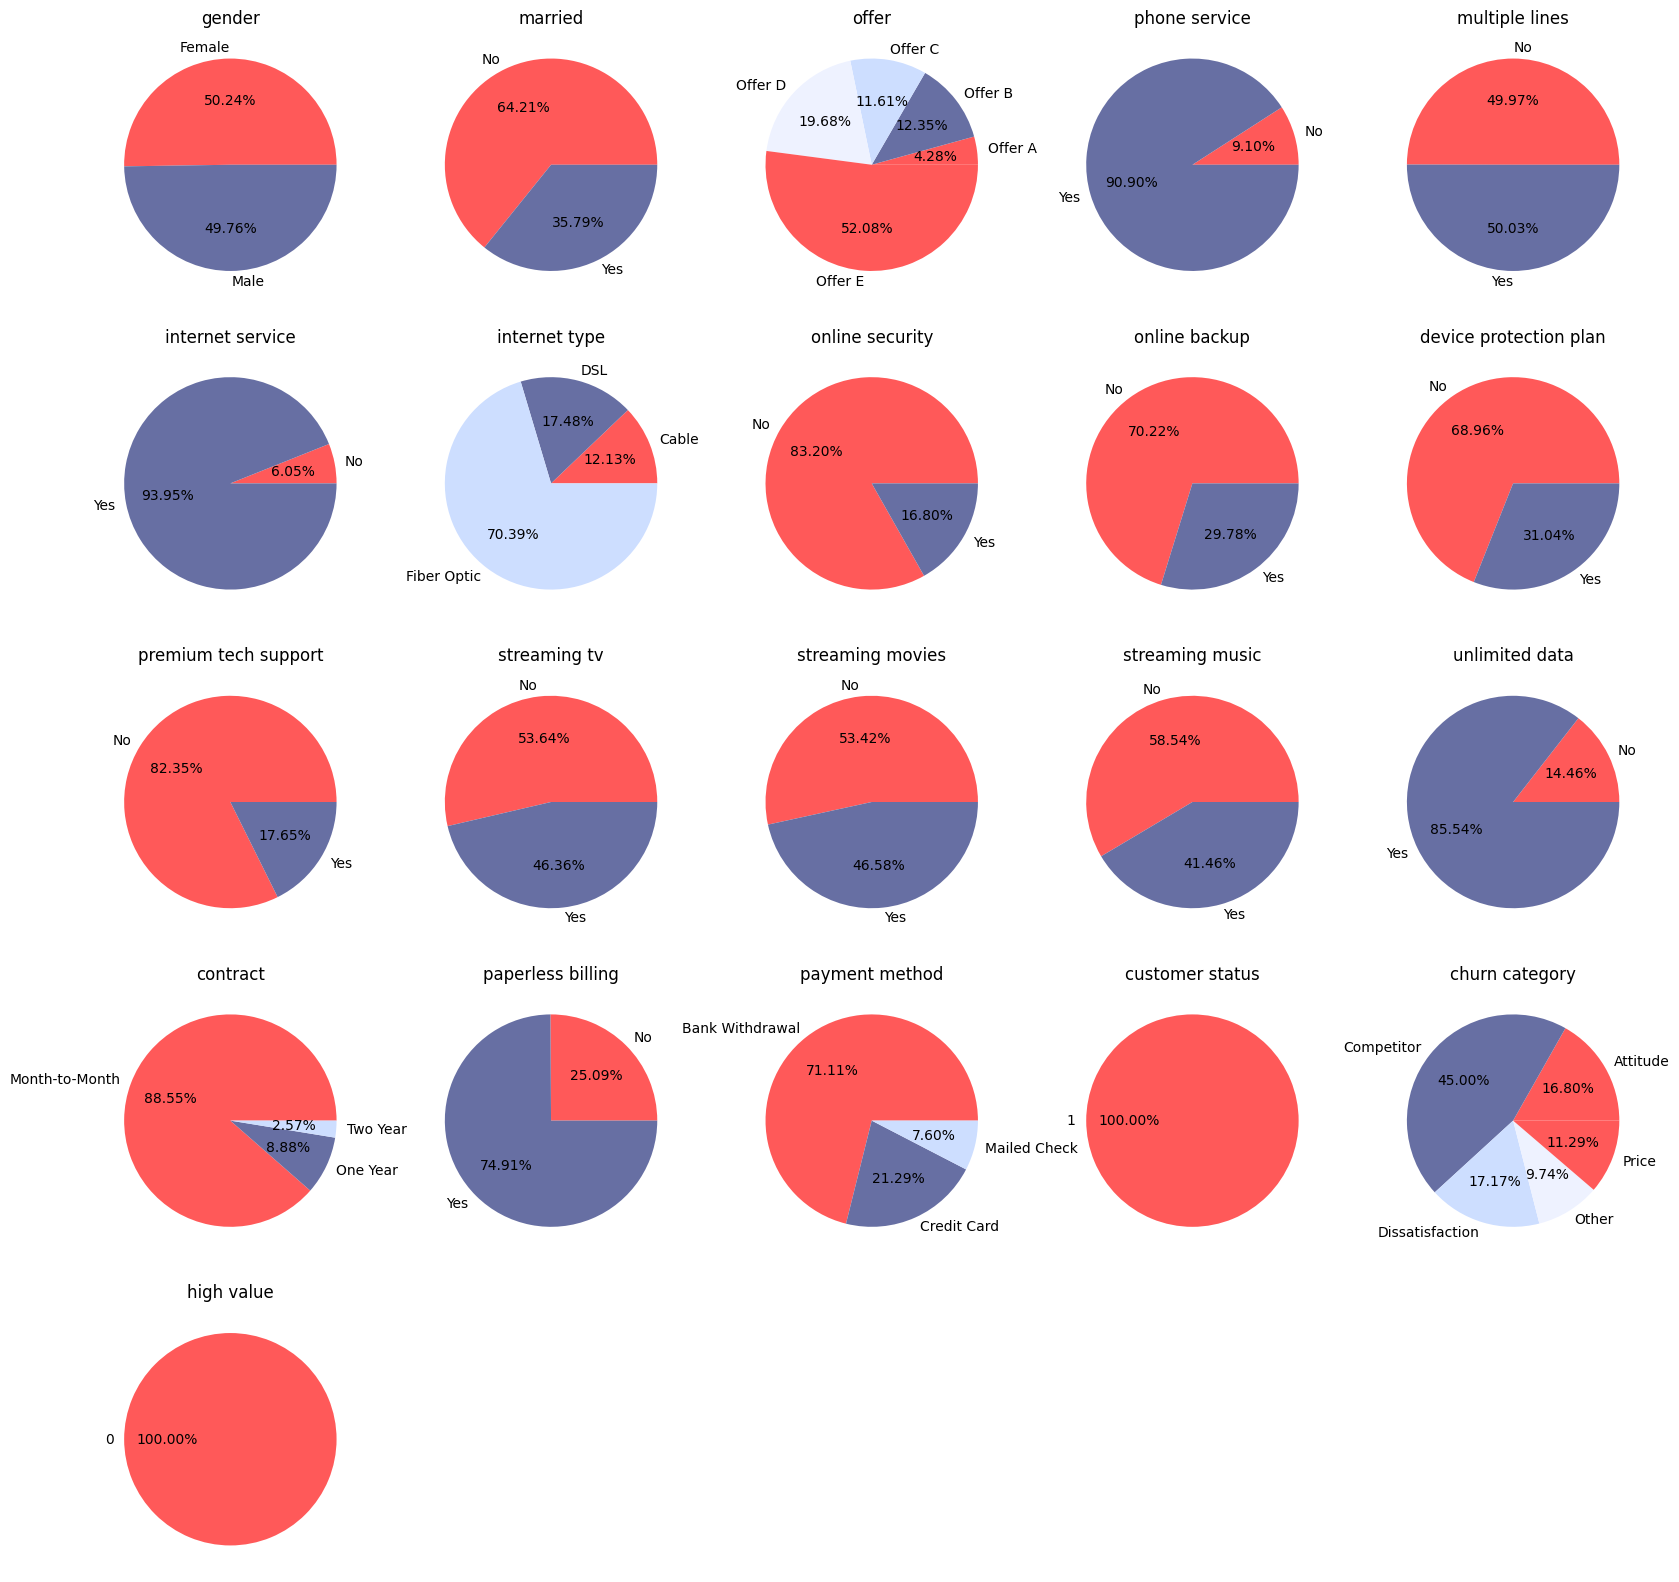

In [40]:
# Select categorical columns with fewer than 10 unique values
cat = [cname for cname in df_churned.columns if df_churned[cname].nunique() < 10 and df_churned[cname].dtype == "object"]

# Create a subset containing only selected categorical columns
_ = df_churned[cat]

fig = plt.figure(figsize=(20, 20))  

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)  # Arrange plots in a grid
    
    # Create pie chart for each categorical feature
    ax = df_churned.groupby([c]).size().plot(
        kind='pie',
        autopct='%.2f%%',
        colors=['#FF5959', '#676FA3', '#CDDEFF', '#EEF2FF']
    )
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')  
    i += 1